In [ ]:
import numpy as np
import xgboost
import gower
import shap
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor
from pandas import read_csv
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn_extra.cluster import KMedoids
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler

In [ ]:
df = pd.read_csv('df_for_modelling.csv')
df = df.drop(columns = 'reactive_resilience')

In [ ]:
df.isnull().sum()

Unnamed: 0                                   0
sector                                       0
NUTS2                                      379
Tax_number                                   0
Report Start Date                            0
Total Net Sales                            705
Cost of Goods Sold                         871
Gross Income                                 7
Financial Operations Income                 37
Regular Operations Income                  336
Extraordinary Income                     28456
Profit After Tax IS_x                       36
Profit or Loss of The Year IS                0
Total Assets                                 1
Shareholder's Equity                        88
Long-Term Liabilities                     1818
Current Liabilities                       1818
Total Liabilities                            1
ROA                                         96
Inventory_turnover                        1259
Manufacturing_Costs_to_Total_Expenses      256
dtype: int64

In [ ]:
seed = 11
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df_clean = df.dropna()
df_clean = df_clean.iloc[:,1:]
df_clean

,sector,NUTS2,Tax_number,Report Start Date,Total Net Sales,Cost of Goods Sold,Gross Income,Financial Operations Income,Regular Operations Income,Extraordinary Income,Profit After Tax IS_x,Profit or Loss of The Year IS,Total Assets,Shareholder's Equity,Long-Term Liabilities,Current Liabilities,Total Liabilities,ROA,Inventory_turnover,Manufacturing_Costs_to_Total_Expenses
0,machinery,Pest,1.056819e+07,2003,4.610900e+07,20296000.0,1531000.0,6000.0,1537000.0,-40000.0,1558000.0,1558000.0,4752000.0,6971000.0,0.0,3028000.0,10365000.0,0.327862,14.373938,0.446056
1,machinery,Pest,1.056819e+07,2004,4.066900e+07,17226000.0,6428000.0,34000.0,6462000.0,0.0,6462000.0,6462000.0,9947000.0,7145000.0,0.0,2508000.0,9966000.0,0.649643,6.454103,0.367818
5,basic_metals,Budapest,1.069999e+07,2002,9.680090e+08,790147000.0,100139000.0,48871000.0,149010000.0,-86000.0,124840000.0,56383000.0,362520000.0,402695000.0,26521000.0,96965000.0,527956000.0,0.344367,27.545651,0.835761
6,basic_metals,Budapest,1.069999e+07,2003,1.014113e+09,870190000.0,59960000.0,32495000.0,92455000.0,-478000.0,78552000.0,78552000.0,400168000.0,464045000.0,79762000.0,252896000.0,859572000.0,0.196298,14.410459,0.870070
7,text_leather,Budapest,1.077182e+07,2002,1.983600e+08,141919000.0,9079000.0,2188000.0,11267000.0,4536000.0,6731000.0,6731000.0,117005000.0,36913000.0,135000.0,47959000.0,86267000.0,0.057527,65.916860,0.457297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99497,chemicals,Central Transdanubia,2.990746e+10,2011,5.465000e+07,27983000.0,3093000.0,25000.0,3118000.0,-250000.0,3120000.0,3120000.0,38063000.0,49409000.0,0.0,2113000.0,51522000.0,0.081969,6.099172,0.521303
99498,chemicals,Central Transdanubia,2.990746e+10,2012,5.548000e+07,22342000.0,3479000.0,242000.0,3721000.0,-20000.0,3389000.0,3389000.0,25593000.0,38070000.0,0.0,3972000.0,42042000.0,0.132419,4.882430,0.418687
99499,chemicals,Central Transdanubia,2.990746e+10,2013,5.170800e+07,25721000.0,7676000.0,-274000.0,7402000.0,-40000.0,6807000.0,6807000.0,32748000.0,40807000.0,13387000.0,29909000.0,84103000.0,0.207860,8.030284,0.536850
99500,chemicals,Central Transdanubia,2.990746e+10,2014,1.020400e+08,38319000.0,39523000.0,44000.0,39567000.0,-40000.0,35828000.0,35828000.0,43698000.0,74778000.0,19200000.0,16975000.0,110953000.0,0.819900,9.770270,0.581331


In [ ]:
df_clean.isnull().sum()

sector                                   0
NUTS2                                    0
Tax_number                               0
Report Start Date                        0
Total Net Sales                          0
Cost of Goods Sold                       0
Gross Income                             0
Financial Operations Income              0
Regular Operations Income                0
Extraordinary Income                     0
Profit After Tax IS_x                    0
Profit or Loss of The Year IS            0
Total Assets                             0
Shareholder's Equity                     0
Long-Term Liabilities                    0
Current Liabilities                      0
Total Liabilities                        0
ROA                                      0
Inventory_turnover                       0
Manufacturing_Costs_to_Total_Expenses    0
dtype: int64

In [ ]:
Train, Test = train_test_split(df_clean, test_size = 0.2, random_state= 11)

In [ ]:
Train.isnull().sum()

sector                                   0
NUTS2                                    0
Tax_number                               0
Report Start Date                        0
Total Net Sales                          0
Cost of Goods Sold                       0
Gross Income                             0
Financial Operations Income              0
Regular Operations Income                0
Extraordinary Income                     0
Profit After Tax IS_x                    0
Profit or Loss of The Year IS            0
Total Assets                             0
Shareholder's Equity                     0
Long-Term Liabilities                    0
Current Liabilities                      0
Total Liabilities                        0
ROA                                      0
Inventory_turnover                       0
Manufacturing_Costs_to_Total_Expenses    0
dtype: int64

In [ ]:
enc = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

enc_raw_data_train = Train.drop(columns = ['Profit After Tax IS_x']).select_dtypes(include = ['object', 'category'])

enc = enc.fit(enc_raw_data_train)

encoded_data_train = pd.DataFrame(enc.transform(enc_raw_data_train))

encoded_data_train.columns = enc.get_feature_names_out(enc_raw_data_train.columns)
encoded_data_train.index = enc_raw_data_train.index


In [ ]:
df_clean.drop(columns = ['Profit After Tax IS_x']).dtypes

sector                                    object
NUTS2                                     object
Tax_number                               float64
Report Start Date                          int64
Total Net Sales                          float64
Cost of Goods Sold                       float64
Gross Income                             float64
Financial Operations Income              float64
Regular Operations Income                float64
Extraordinary Income                     float64
Profit or Loss of The Year IS            float64
Total Assets                             float64
Shareholder's Equity                     float64
Long-Term Liabilities                    float64
Current Liabilities                      float64
Total Liabilities                        float64
ROA                                      float64
Inventory_turnover                       float64
Manufacturing_Costs_to_Total_Expenses    float64
dtype: object

In [ ]:

TrainDS_Enc = pd.concat([Train.drop(enc_raw_data_train.columns, errors='ignore', axis = 1), encoded_data_train], axis = 1)

Train = TrainDS_Enc

TrainDS_Enc.isnull().sum()

Tax_number                               0
Report Start Date                        0
Total Net Sales                          0
Cost of Goods Sold                       0
Gross Income                             0
Financial Operations Income              0
Regular Operations Income                0
Extraordinary Income                     0
Profit After Tax IS_x                    0
Profit or Loss of The Year IS            0
Total Assets                             0
Shareholder's Equity                     0
Long-Term Liabilities                    0
Current Liabilities                      0
Total Liabilities                        0
ROA                                      0
Inventory_turnover                       0
Manufacturing_Costs_to_Total_Expenses    0
sector_agri                              0
sector_basic_metals                      0
sector_chemicals                         0
sector_comp_electr                       0
sector_machinery                         0
sector_othe

In [ ]:
Train.drop(enc_raw_data_train.columns, errors='ignore', axis = 1)

,Tax_number,Report Start Date,Total Net Sales,Cost of Goods Sold,Gross Income,Financial Operations Income,Regular Operations Income,Extraordinary Income,Profit After Tax IS_x,Profit or Loss of The Year IS,Total Assets,Shareholder's Equity,Long-Term Liabilities,Current Liabilities,Total Liabilities,ROA,Inventory_turnover,Manufacturing_Costs_to_Total_Expenses
11160,1.101104e+10,2010,1.552910e+08,1.294890e+08,9578000.0,-6496000.0,3082000.0,0.0,2595000.0,2595000.0,50538000.0,70584000.0,87506000.0,32996000.0,191086000.0,0.051348,11.034427,0.783960
18103,1.123826e+10,2002,9.658900e+07,6.251900e+07,4241000.0,-2436000.0,1805000.0,0.0,1805000.0,1805000.0,79376000.0,15894000.0,13294000.0,70590000.0,100348000.0,0.022740,0.833798,0.555083
23950,1.146659e+10,2008,8.849300e+07,8.048900e+07,-3402000.0,3000.0,-3399000.0,5000000.0,-8747000.0,-8747000.0,18620000.0,4234000.0,0.0,5577000.0,20599000.0,-0.469764,7.459592,0.870895
64306,1.366654e+10,2007,8.470000e+05,4.050000e+05,-3001000.0,1000.0,-3000000.0,0.0,-3000000.0,-3000000.0,4791000.0,4825000.0,0.0,289000.0,5114000.0,-0.626174,0.226764,0.104895
58269,1.330265e+10,2008,8.459600e+07,5.402300e+07,3122000.0,-258000.0,2864000.0,0.0,2689000.0,2689000.0,7169000.0,7144000.0,2928000.0,13001000.0,23391000.0,0.375087,8.249046,0.630241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49958,1.286454e+10,2015,3.444600e+07,3.402900e+07,-3127000.0,-256000.0,-3383000.0,-3000.0,-3454000.0,-3454000.0,39369000.0,9016000.0,2418000.0,38701000.0,50169000.0,-0.087734,127.928571,0.835190
10624,1.097126e+10,2009,1.446640e+09,1.301163e+09,83551000.0,-12913000.0,70638000.0,0.0,67409000.0,67409000.0,510413000.0,204050000.0,5213000.0,259365000.0,501103000.0,0.132068,75.491007,0.762846
32721,1.195171e+10,2009,1.374820e+08,7.413900e+07,15433000.0,-13288000.0,2145000.0,-6000.0,1699000.0,1699000.0,107470000.0,-11024000.0,137065000.0,53139000.0,180523000.0,0.015809,1.012648,0.388372
58215,1.329929e+10,2009,3.020720e+08,2.486520e+08,17996000.0,-4774000.0,13222000.0,0.0,12299000.0,12299000.0,57120000.0,14673000.0,15007000.0,53282000.0,95358000.0,0.215319,32.444154,0.849474


In [ ]:
Train.drop(enc_raw_data_train.columns, errors='ignore', axis = 1).shape

(40903, 18)

In [ ]:
encoded_data_train.isnull().sum()

sector_agri                    0
sector_basic_metals            0
sector_chemicals               0
sector_comp_electr             0
sector_machinery               0
sector_other                   0
sector_text_leather            0
sector_wood_paper_furni        0
NUTS2_Budapest                 0
NUTS2_Central Transdanubia     0
NUTS2_Northern Great Plain     0
NUTS2_Northern Hungary         0
NUTS2_Pest                     0
NUTS2_Southern Great Plain     0
NUTS2_Southern Transdanubia    0
NUTS2_Western Transdanubia     0
dtype: int64

In [ ]:
encoded_data_train.shape

(51129, 16)

In [ ]:
Train.isnull().sum()

sector                                   0
NUTS2                                    0
Tax_number                               0
Report Start Date                        0
Total Net Sales                          0
Cost of Goods Sold                       0
Gross Income                             0
Financial Operations Income              0
Regular Operations Income                0
Extraordinary Income                     0
Profit After Tax IS_x                    0
Profit or Loss of The Year IS            0
Total Assets                             0
Shareholder's Equity                     0
Long-Term Liabilities                    0
Current Liabilities                      0
Total Liabilities                        0
ROA                                      0
Inventory_turnover                       0
Manufacturing_Costs_to_Total_Expenses    0
dtype: int64

In [ ]:
enc = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

enc_raw_data_test = Test.drop(columns = ['Profit After Tax IS_x']).select_dtypes(include = ['object', 'category'])

enc = enc.fit(enc_raw_data_test)

encoded_data_test = pd.DataFrame(enc.transform(enc_raw_data_test))

encoded_data_test.columns = enc.get_feature_names_out(enc_raw_data_test.columns)
encoded_data_test.index = enc_raw_data_test.index

TestDS_Enc = pd.concat([Test.drop(enc_raw_data_test.columns, axis = 1), encoded_data_test], axis = 1)

Test = TestDS_Enc

In [ ]:
X_train = Train.drop(columns = 'Profit After Tax IS_x')
Y_train = Train['Profit After Tax IS_x']

X_test = Test.drop(columns = 'Profit After Tax IS_x')
Y_test = Test['Profit After Tax IS_x']

In [ ]:
X_train.isnull().sum()

Tax_number                               0
Report Start Date                        0
Total Net Sales                          0
Cost of Goods Sold                       0
Gross Income                             0
Financial Operations Income              0
Regular Operations Income                0
Extraordinary Income                     0
Profit or Loss of The Year IS            0
Total Assets                             0
Shareholder's Equity                     0
Long-Term Liabilities                    0
Current Liabilities                      0
Total Liabilities                        0
ROA                                      0
Inventory_turnover                       0
Manufacturing_Costs_to_Total_Expenses    0
sector_agri                              0
sector_basic_metals                      0
sector_chemicals                         0
sector_comp_electr                       0
sector_machinery                         0
sector_other                             0
sector_text

In [ ]:
Regressor = XGBRegressor(random_state= seed, objective= 'reg:squarederror')

model = Regressor.fit(X_train, Y_train)

100%|===================| 40768/40903 [00:52<00:00]        

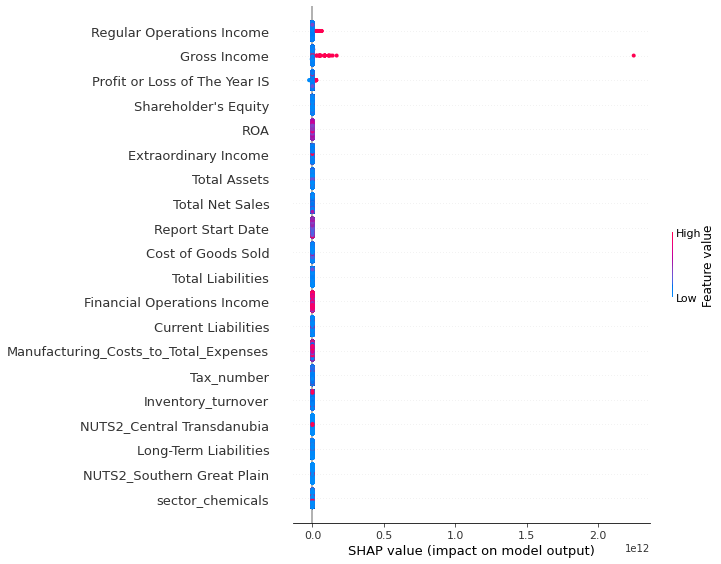

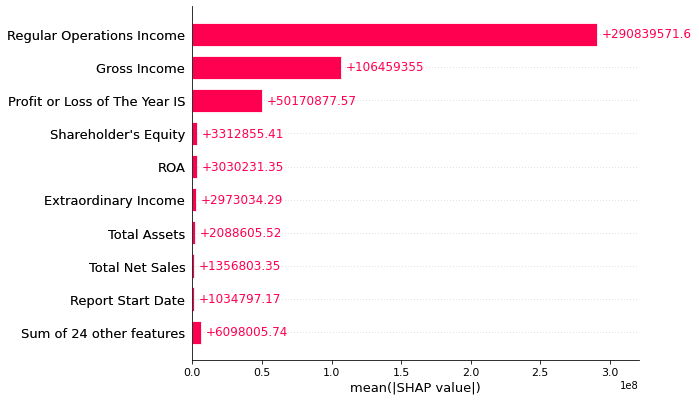

In [ ]:
X = Train.drop(columns = 'Profit After Tax IS_x', axis = 1)
Y = Train['Profit After Tax IS_x']
#explainer = shap.TreeExplainer(model)
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
#shap_values = explainer.shap_values(xgboost.DMatrix(X, label = Y))
shap.summary_plot(shap_values, X)
shap.plots.bar(shap_values)

In [ ]:
shap_values

array([[ 2.84383844e+05,  2.41826328e+05, -2.85316125e+05, ...,
         8.01918359e+03, -7.92593750e+03, -3.98075836e+02],
       [ 1.45571484e+05, -7.08153672e+04, -3.62782062e+05, ...,
         7.50167188e+03, -7.92593750e+03, -1.69947229e+03],
       [ 9.98669141e+04,  8.29802422e+04, -1.26285425e+06, ...,
         6.98825195e+03,  5.35062317e+02,  1.21305781e+04],
       ...,
       [ 1.35821219e+05,  1.29571992e+05, -3.62434219e+05, ...,
         7.70257910e+03,  5.35062317e+02, -2.32580884e+03],
       [-4.73600844e+05,  1.13291266e+05, -2.18092672e+05, ...,
         7.50167188e+03,  5.35062317e+02,  2.90569031e+02],
       [ 1.41020406e+05, -2.89909648e+04, -3.69371312e+05, ...,
         7.70257910e+03,  5.35062317e+02,  7.67590674e+03]], dtype=float32)

In [ ]:
df_clean['sector'].unique()

array(['machinery', 'basic_metals', 'text_leather', 'wood_paper_furni',
       'other', 'comp_electr', 'chemicals', 'agri'], dtype=object)